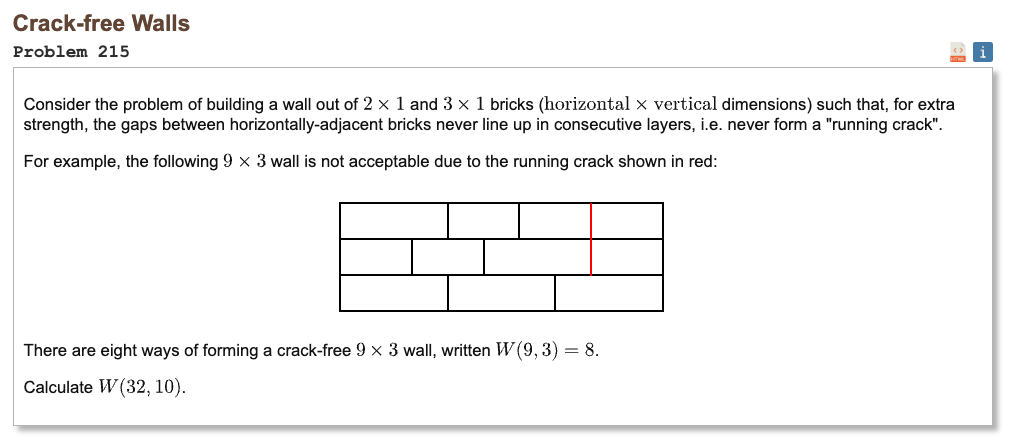

## Initial approach

* represent each row by the set of internal crack positions between bricks
* build all possible rows of width 32 using 2 and 3 length bricks, and store cracks as a bitmask
* two consecutive rows are compatible if their crack bitmasks share no common bit
* precompute a compatibility list for every row by checking bitmask intersections
* use dynamic programming over height, where dp[i] is the number of ways to end a layer with row i
* start with all rows allowed for the first layer, then transition using only compatible rows
* sum the dp values after 10 layers to get the total number of crack free walls

In [1]:
def generate_patterns(width):
    patterns = []
    def rec(pos, mask):
        if pos == width:
            patterns.append(mask)
            return
        npos = pos + 2
        if npos <= width:
            nmask = mask
            if npos < width:
                nmask |= 1 << npos
            rec(npos, nmask)
        npos = pos + 3
        if npos <= width:
            nmask = mask
            if npos < width:
                nmask |= 1 << npos
            rec(npos, nmask)
    rec(0, 0)
    return patterns

def solve():
    width = 32
    height = 10

    masks = generate_patterns(width)
    m = len(masks)

    comp = [[] for _ in range(m)]
    for i in range(m):
        mi = masks[i]
        for j in range(i + 1, m):
            if mi & masks[j] == 0:
                comp[i].append(j)
                comp[j].append(i)

    dp = [1] * m
    for _ in range(height - 1):
        ndp = [0] * m
        for i in range(m):
            s = 0
            for j in comp[i]:
                s += dp[j]
            ndp[i] = s
        dp = ndp

    return sum(dp)

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 806844323190414
CPU times: user 245 ms, sys: 4.56 ms, total: 249 ms
Wall time: 250 ms
